# Comprendre Prophet : Un Modèle de Prévision de Séries Temporelles

## Qu'est-ce que Prophet ?

**Prophet** est un modèle développé par Facebook (Meta) pour la prévision de séries temporelles. Il est conçu pour gérer des données présentant des tendances, des variations saisonnières et des irrégularités. Contrairement aux modèles statistiques classiques comme **ARIMA** ou **GARCH**, Prophet est basé sur une approche **additive** et est particulièrement robuste aux données manquantes et aux anomalies.

Prophet repose sur une décomposition du signal en plusieurs composantes :

1. **Tendance globale** (*trend*) : Une fonction flexible qui capture l’évolution à long terme des données.
2. **Saisonnalité** (*seasonality*) : Des motifs récurrents à différentes échelles de temps (hebdomadaire, mensuelle, annuelle).
3. **Effets ponctuels et événements spéciaux** (*holidays, changepoints*) : Il permet d’intégrer des événements inhabituels qui influencent temporairement les données.

## Pourquoi utiliser Prophet ?

- **Facilité d’utilisation** : Contrairement aux modèles classiques nécessitant un ajustement manuel des paramètres, Prophet fonctionne de manière automatisée et optimise les hyperparamètres par défaut.
- **Flexibilité** : Il peut gérer à la fois les tendances linéaires et logistiques, ainsi que des données irrégulières.
- **Interprétabilité** : Il fournit une visualisation des composantes du modèle (tendance, saisonnalité, impact des événements externes).
- **Robustesse** : Il tolère les valeurs manquantes et les changements soudains dans la série temporelle.

In [47]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
import sklearn as sk
from matplotlib import pyplot
from pandas import read_csv
import plotly.express as px

Nous avons 144 données dans notre dataframe


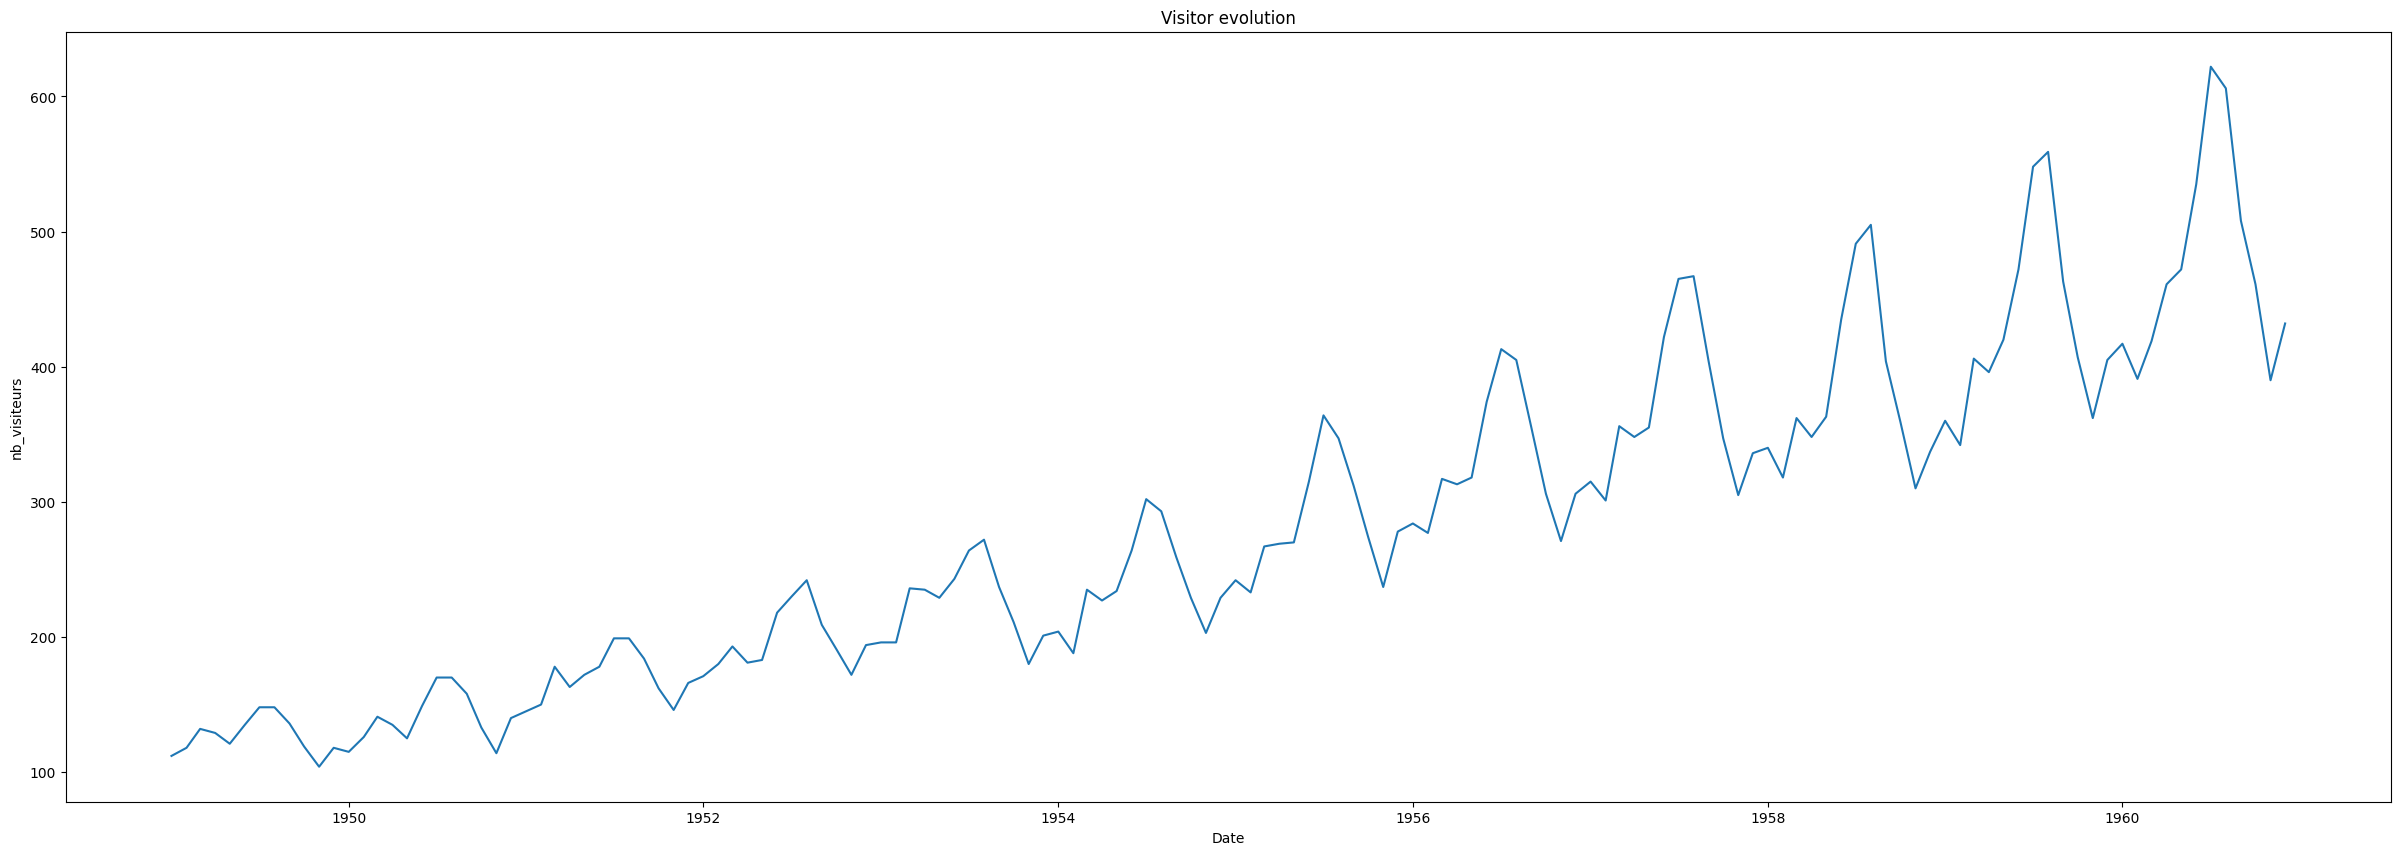

In [28]:
df = read_csv('./cleaned_data.csv', sep=',')
print("Nous avons", len(df), "données dans notre dataframe")
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m') 
df = df.set_index(['DATE'])
plt.figure(figsize=(30, 10))
plt.title('Visitor evolution')
plt.xlabel('Date')
plt.ylabel('nb_visiteurs')
plt.plot(df)
plt.show()

In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nb_visiteurs  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


,nb_visiteurs
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [29]:
df = df.reset_index()
df_prophet = df.rename(columns={'DATE' : 'ds', 'nb_visiteurs' : 'y'})
df_prophet

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [30]:
ts = Prophet()
ts.fit(df_prophet)

16:55:52 - cmdstanpy - INFO - Chain [1] start processing
16:55:53 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future = ts.make_future_dataframe(periods=0)
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01


In [44]:
fc = ts.predict(future)
fc

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,54.754308,110.927319,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,49.336907,109.088967,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,81.027659,138.951100,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,79.460086,137.448100,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,81.385561,139.233563,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,472.318175,513.582141,570.864323,472.318175,472.318175,68.209069,68.209069,68.209069,68.209069,68.209069,68.209069,0.0,0.0,0.0,540.527244
140,1960-09-01,475.435570,464.070858,521.662678,475.435570,475.435570,16.100699,16.100699,16.100699,16.100699,16.100699,16.100699,0.0,0.0,0.0,491.536268
141,1960-10-01,478.452403,430.812220,487.017680,478.452403,478.452403,-21.748641,-21.748641,-21.748641,-21.748641,-21.748641,-21.748641,0.0,0.0,0.0,456.703762
142,1960-11-01,481.569798,394.833418,451.131525,481.569798,481.569798,-59.614495,-59.614495,-59.614495,-59.614495,-59.614495,-59.614495,0.0,0.0,0.0,421.955303


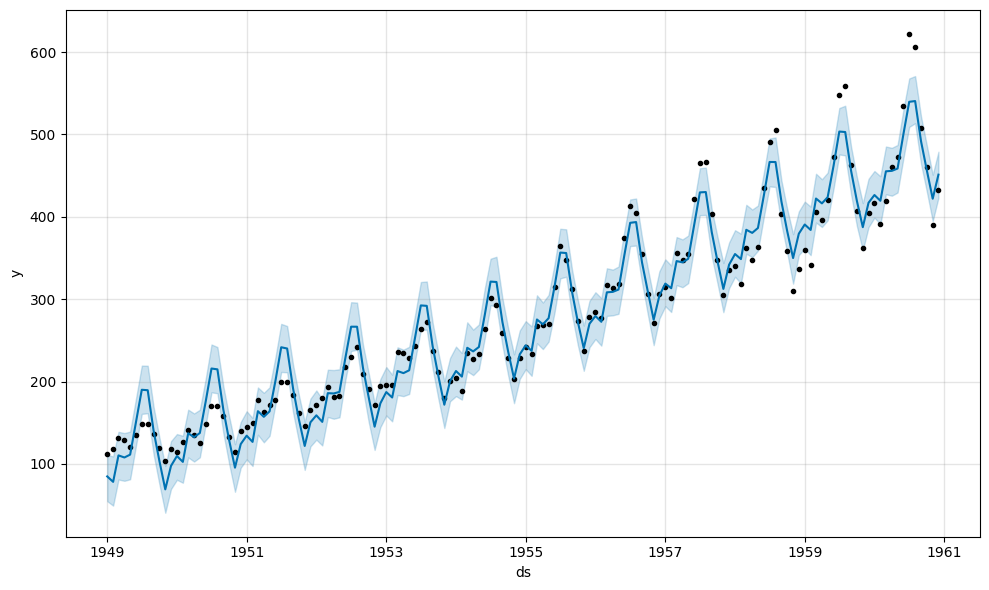

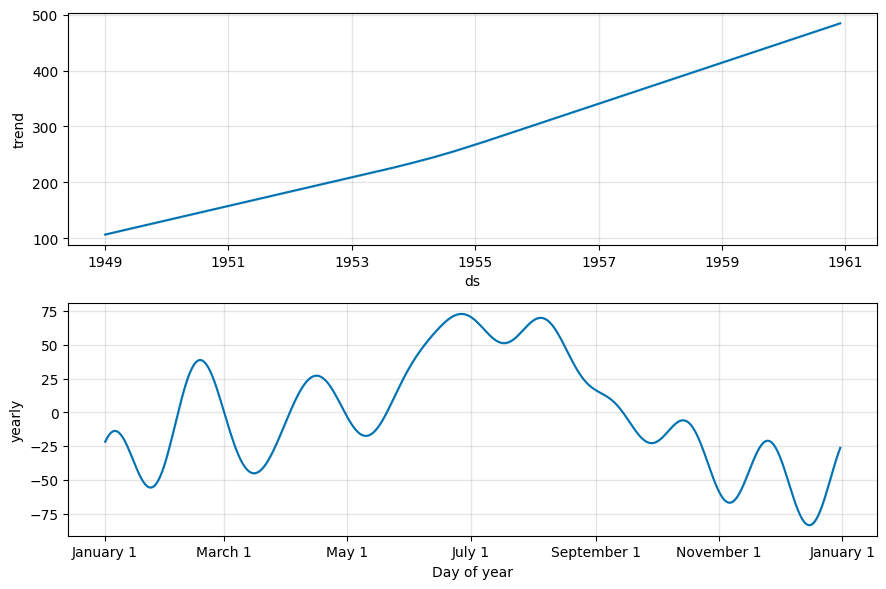

In [45]:
ts.plot(fc)
ts.plot_components(fc)
plt.show()